In [2]:
from pyaudi import gdual
from pyaudi import sin, cos, tanh
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
import nn
n_units = [2, 5, 5, 2]
order = 1

In [4]:
def step(state, u, t):
    state[0] += u[0]*t
    state[1] += u[1]*t
    return state
    

In [5]:
x = gdual(10,'x',1)
y = gdual(10,'y',1)

In [6]:
state = [x,y]

In [24]:
weights = nn.initialize_weights(n_units, order)                
biases = nn.initialize_biases(n_units, order)     
trajs = []

In [28]:
trajs = []

In [ ]:
t = 0.1
for epoch in range(50):
    traj = []
    x = np.random.rand()*10-5
    y = np.random.rand()*10-5
    state = [x,y]
    traj.append((state[0], state[1]))
    for i in range(20):
        N = nn.N_f(state, weights, biases)
        u = [0,0]
        u[0] = N[0]
        u[1] = N[1]
        state = step(state, u, t)
        traj.append((state[0].constant_cf, state[1].constant_cf))

    loss = (state[0]**2 + state[1]**2)
    print(loss.constant_cf)
    
    weights, biases = nn.GD_update(loss, weights, biases, 0.01) 
    trajs.append(traj)

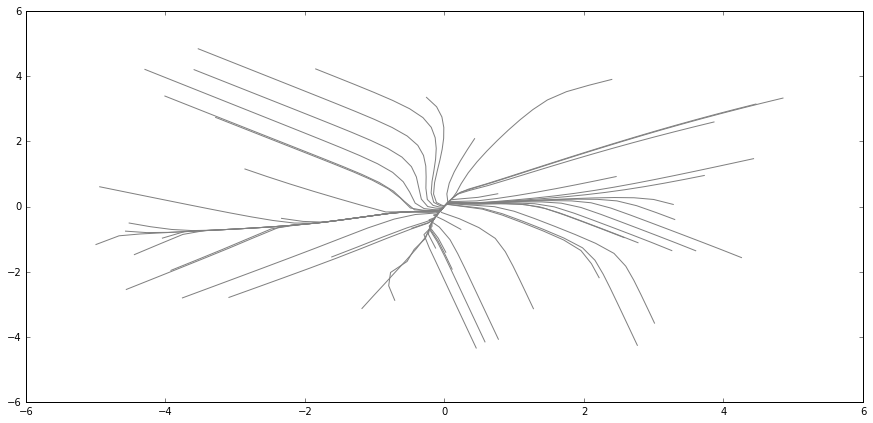

In [35]:
plt.rcParams['figure.figsize'] = (15,7)

    
for epoch in range(len(trajs)):
    traj = np.asarray(trajs[int(epoch)])
    plt.plot(traj[:,0], traj[:,1], color='gray')

